In [1]:
import pandas as pd
import numpy as np

In [2]:
def load_rt():
    rt = pd.read_csv('https://raw.githubusercontent.com/KITmetricslab/RESPINOW-Hub/refs/heads/main/data/icosari/sari/reporting_triangle-icosari-sari-preprocessed.csv',
                 parse_dates=['date'])

    return rt.loc[:, : 'value_4w']

In [3]:
def set_last_n_values_to_nan(group):
    for i in [1, 2, 3, 4]:  # Loop for value_1w, value_2w, ..., value_4w
        group.loc[group.index[-i:], f'value_{i}w'] = np.nan
    return group

In [4]:
def rt_as_of(rt, date):
    date = pd.Timestamp(date)
    rt_temp = rt[rt.date <= date]
    
    # in column 'value_1w' the last entry is set to nan, in column 'value_2w' the last two entries, etc.
    rt_temp = rt_temp.groupby('age_group').apply(set_last_n_values_to_nan, include_groups=False).reset_index()
    rt_temp['value'] = rt_temp[['value_0w', 'value_1w', 'value_2w', 'value_3w', 'value_4w']].sum(axis=1)
    
    return rt_temp[['location', 'age_group', 'year', 'week', 'date', 'value']]

In [5]:
rt = load_rt()

In [6]:
rt1 = rt_as_of(rt, '2024-03-21')

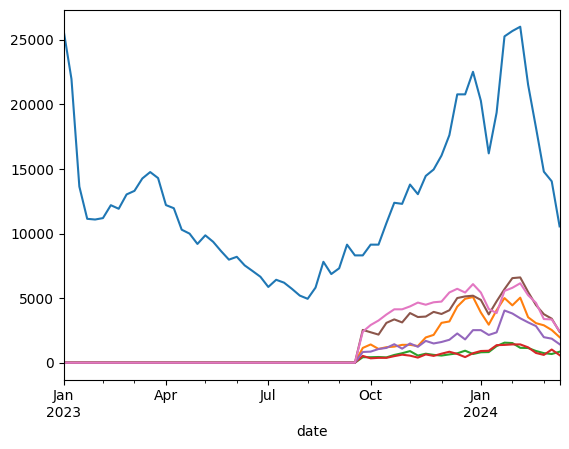

In [7]:
rt1.set_index('date').groupby('age_group')['value'].plot();

In [8]:
rt2 = rt_as_of(rt, '2024-04-18')

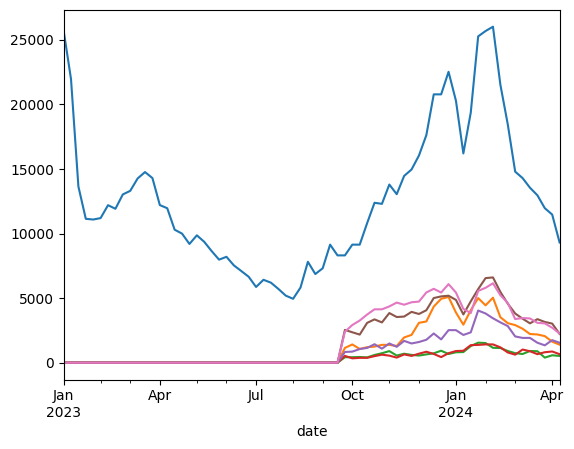

In [9]:
rt2.set_index('date').groupby('age_group')['value'].plot();

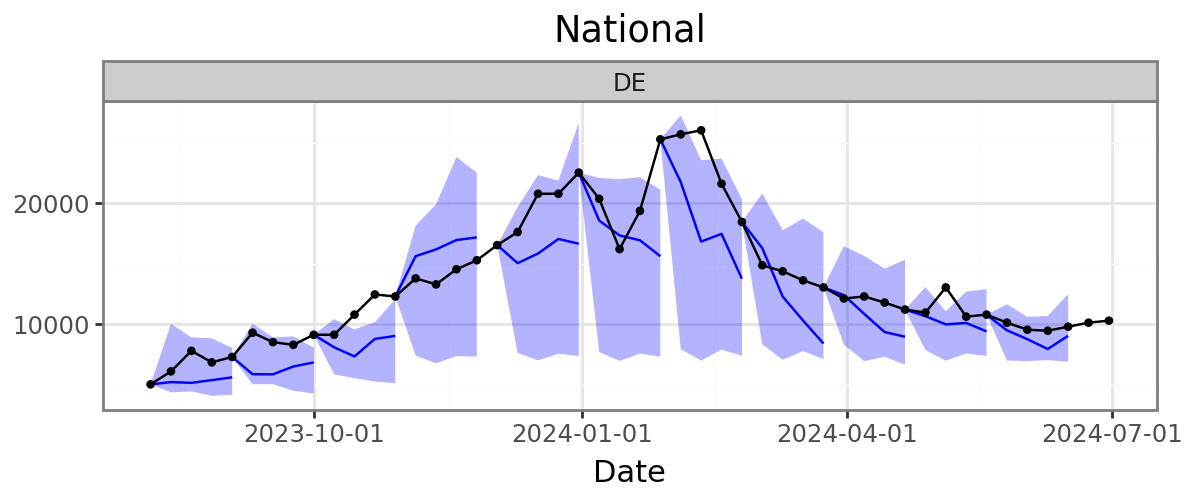

In [101]:
plot_forecasts(df_plot, 'national', start=1, stride=4)

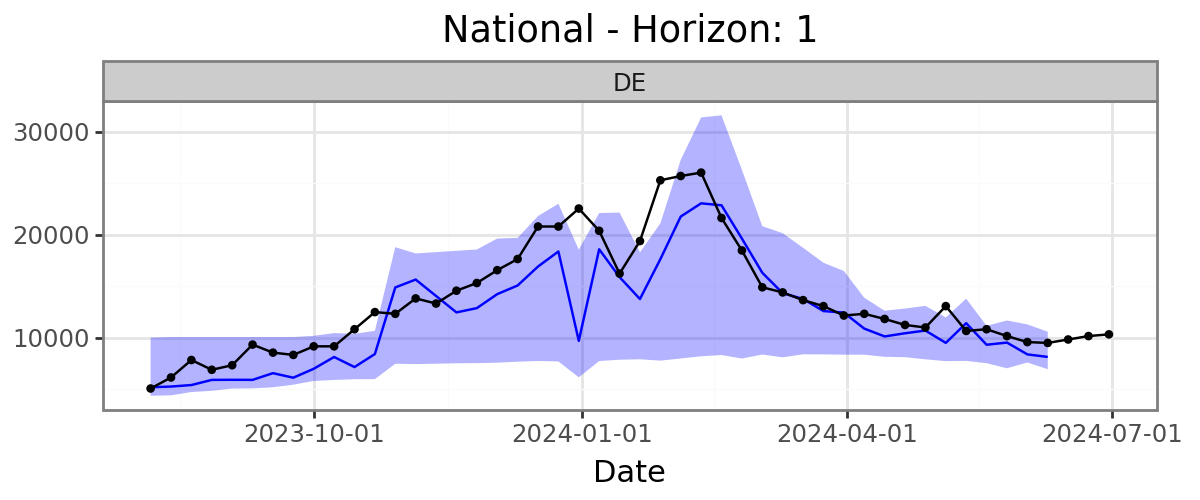

In [102]:
plot_forecasts(df_plot, 'national', horizon=1)

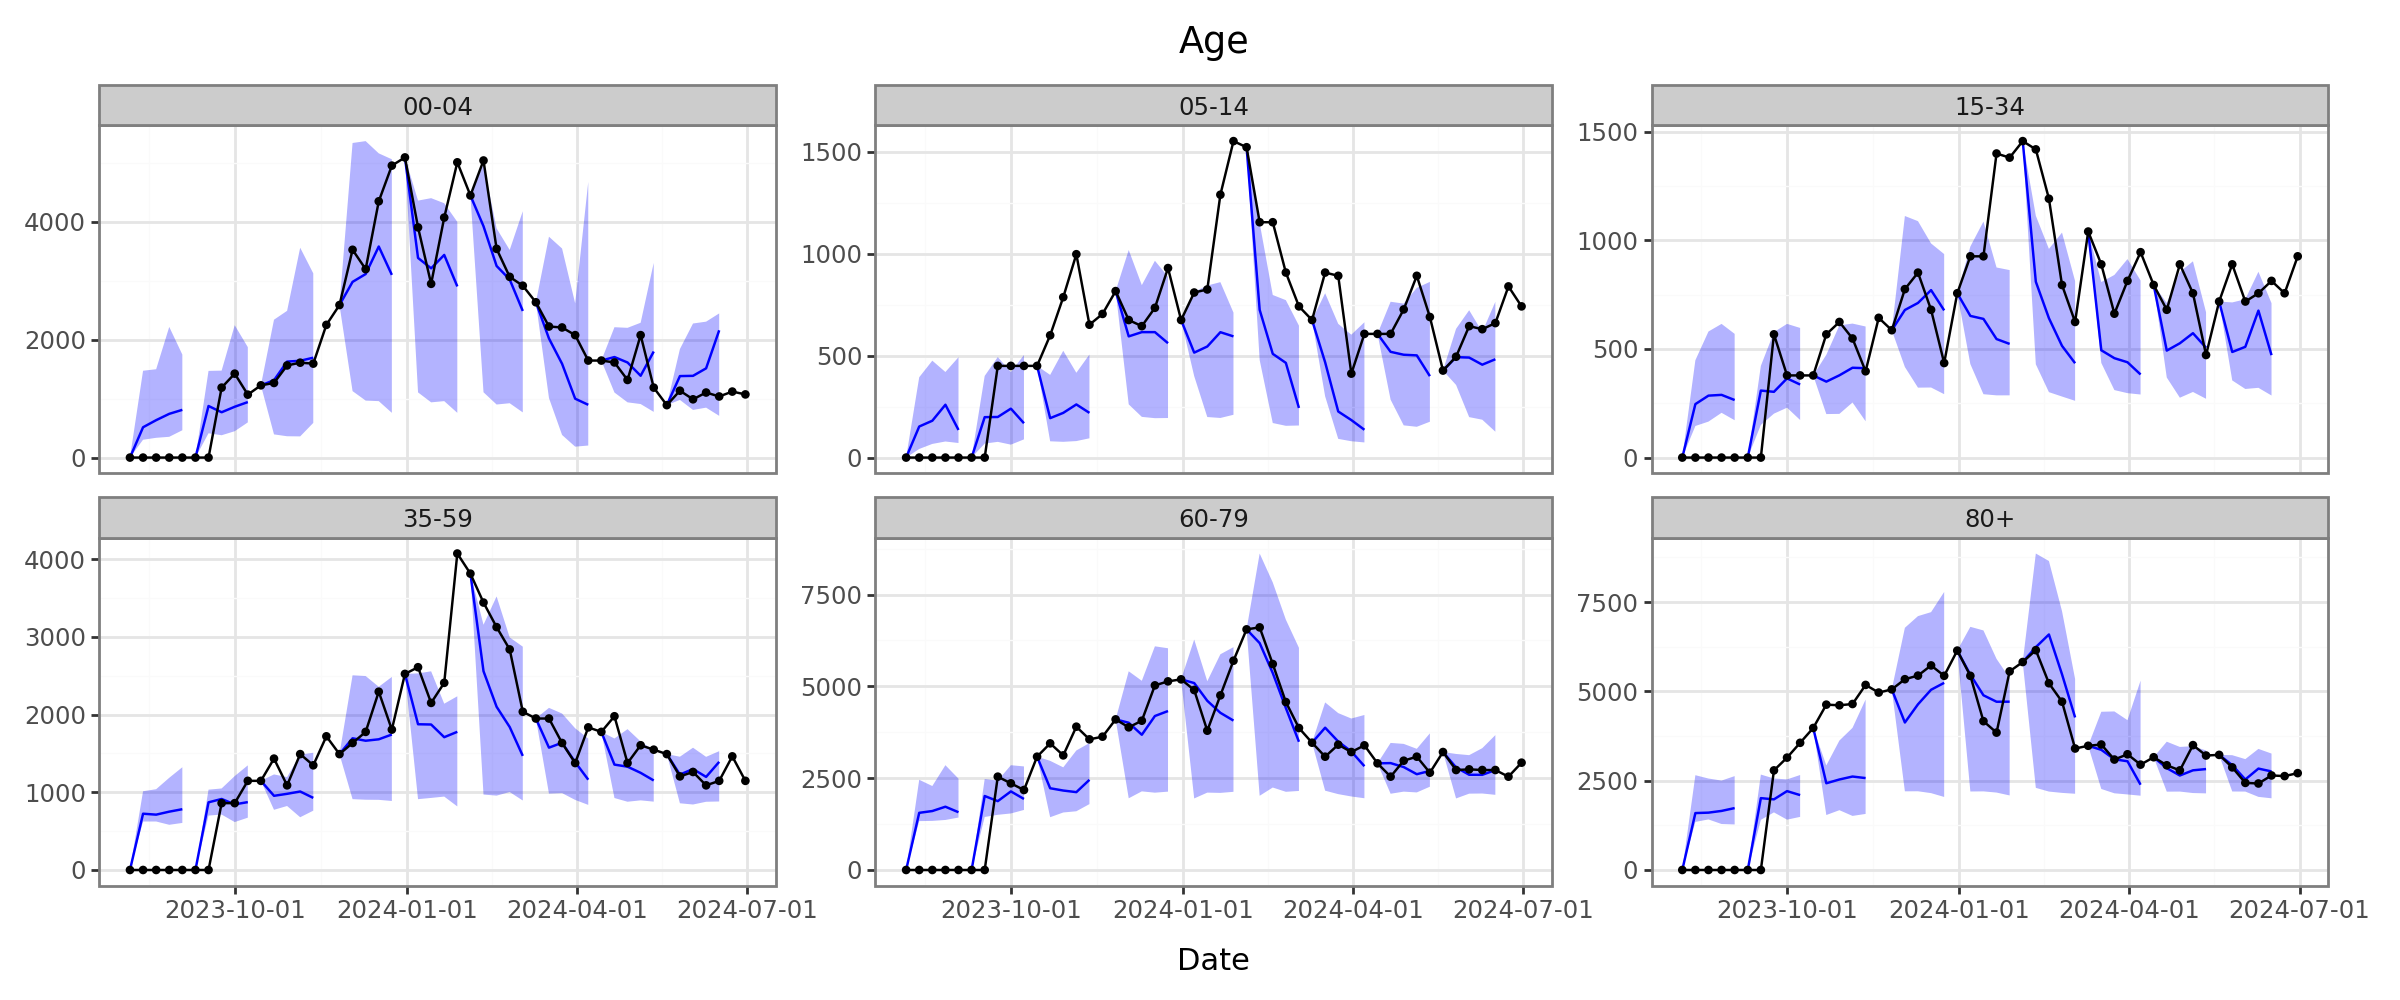

In [103]:
plot_forecasts(df_plot, 'age', start=1)

### Global, covariates, lag 8, no encoders

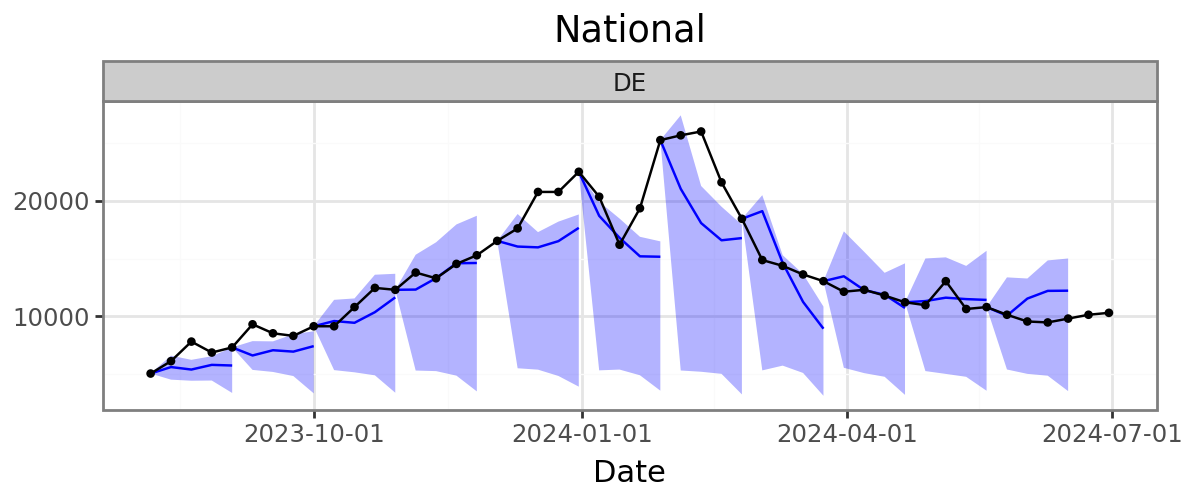

In [70]:
plot_forecasts(df_plot, 'national', start=1, stride=4)

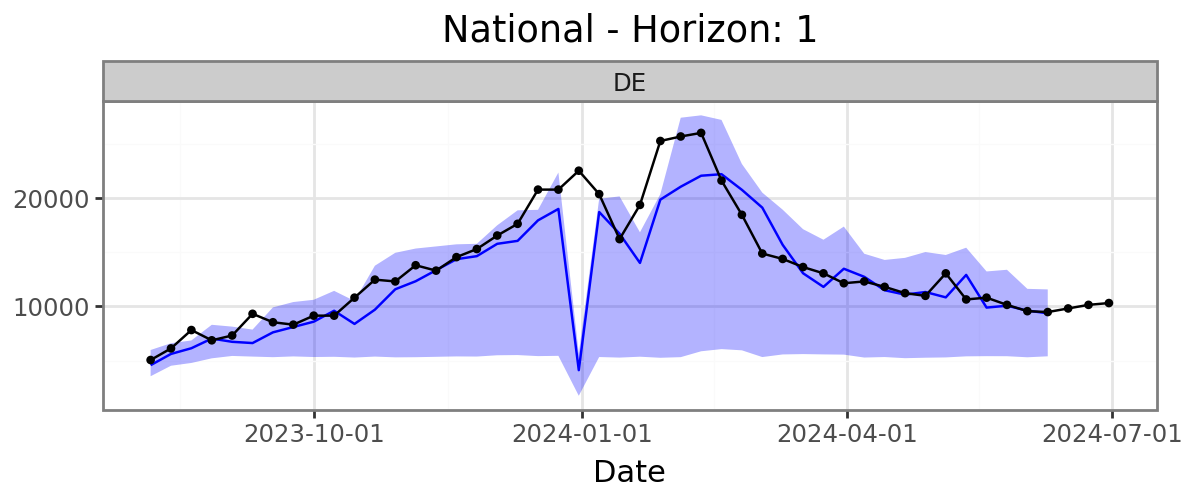

In [71]:
plot_forecasts(df_plot, 'national', horizon=1)

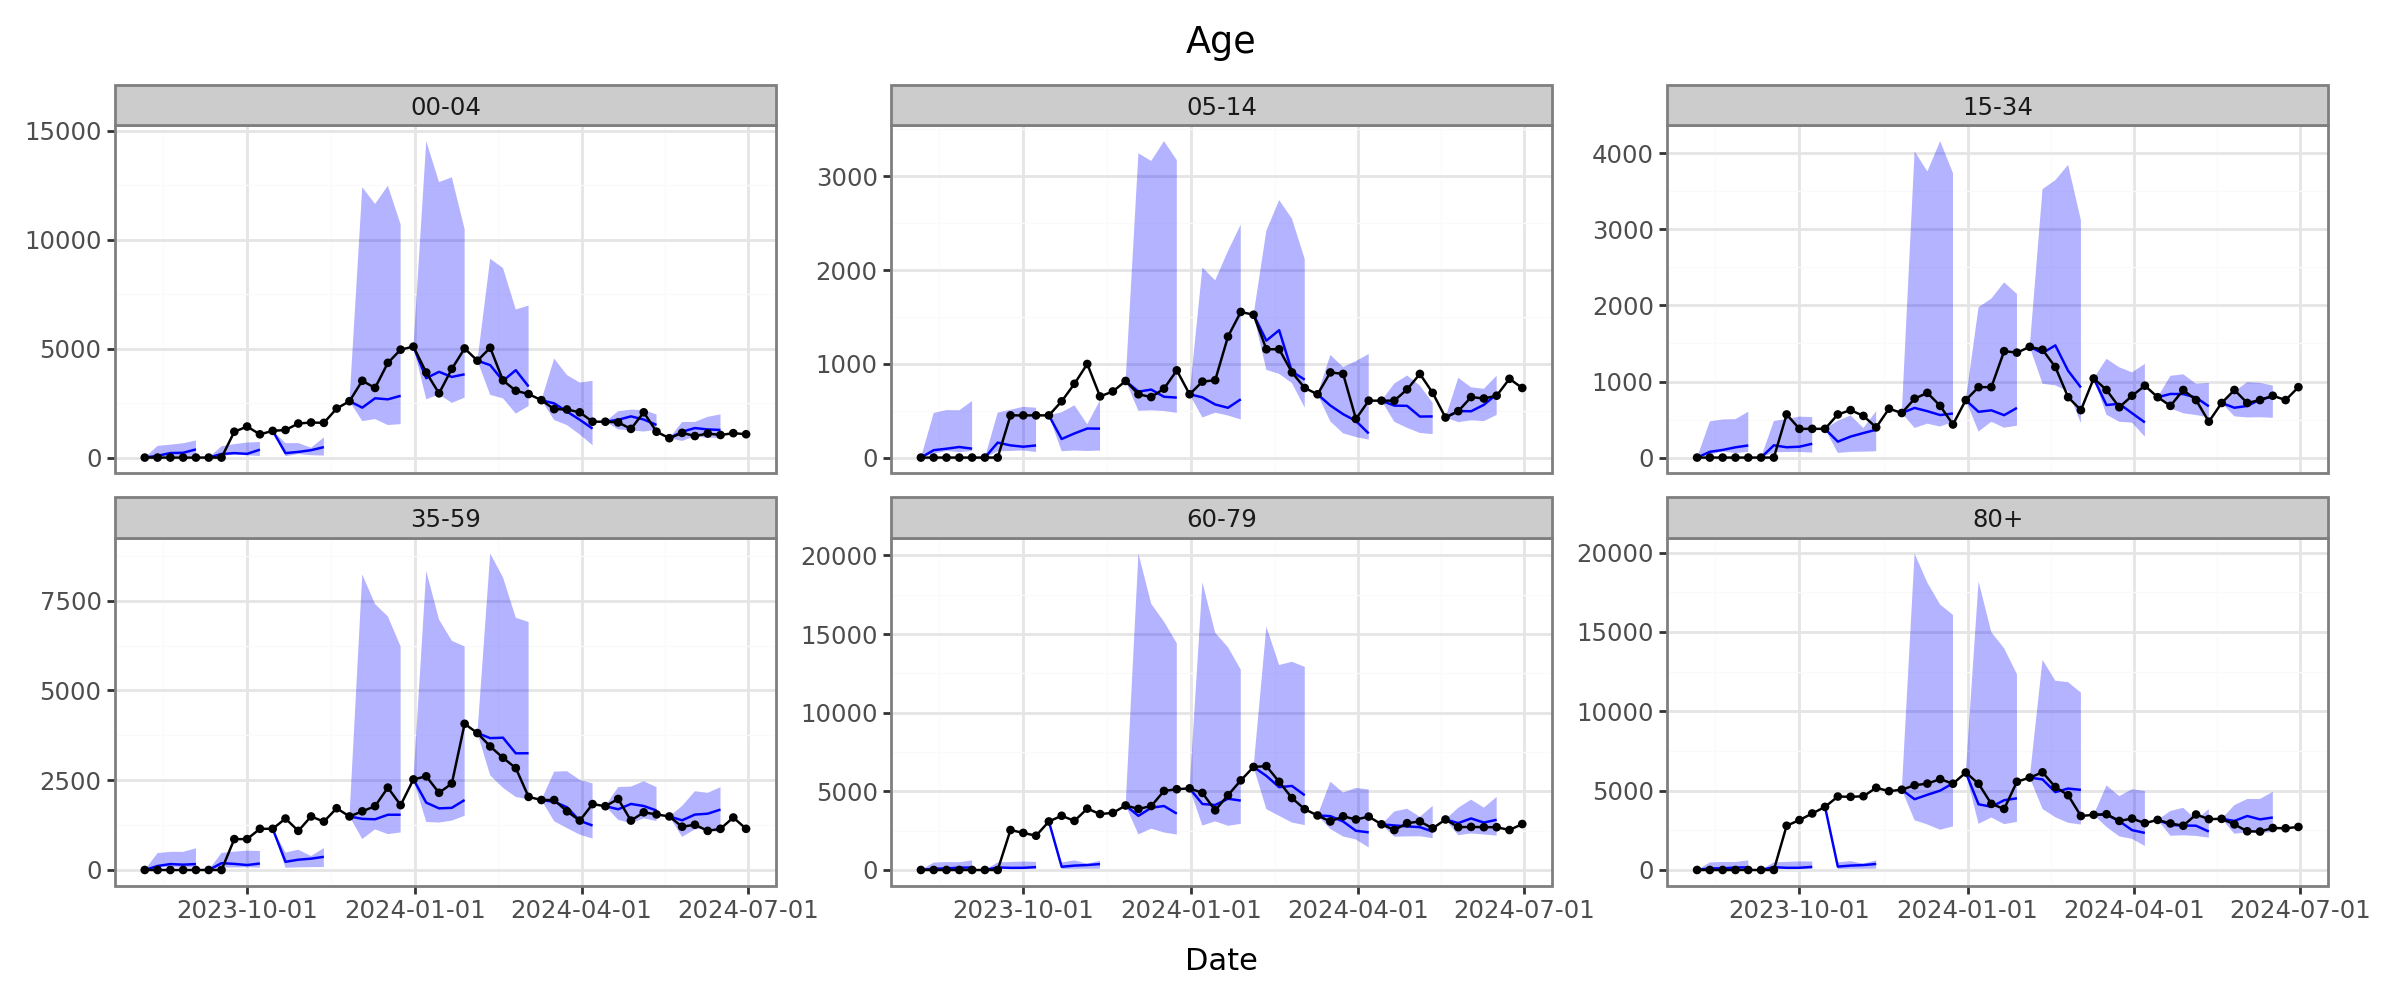

In [72]:
plot_forecasts(df_plot, 'age', start=1)

### Global, covariates, lag 8

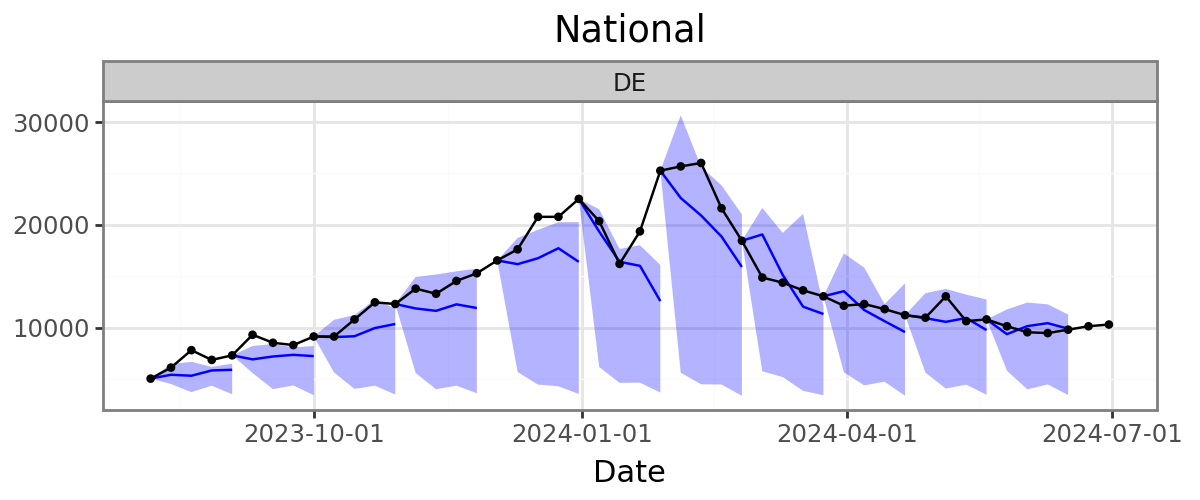

In [32]:
plot_forecasts(df_plot, 'national', start=1, stride=4)

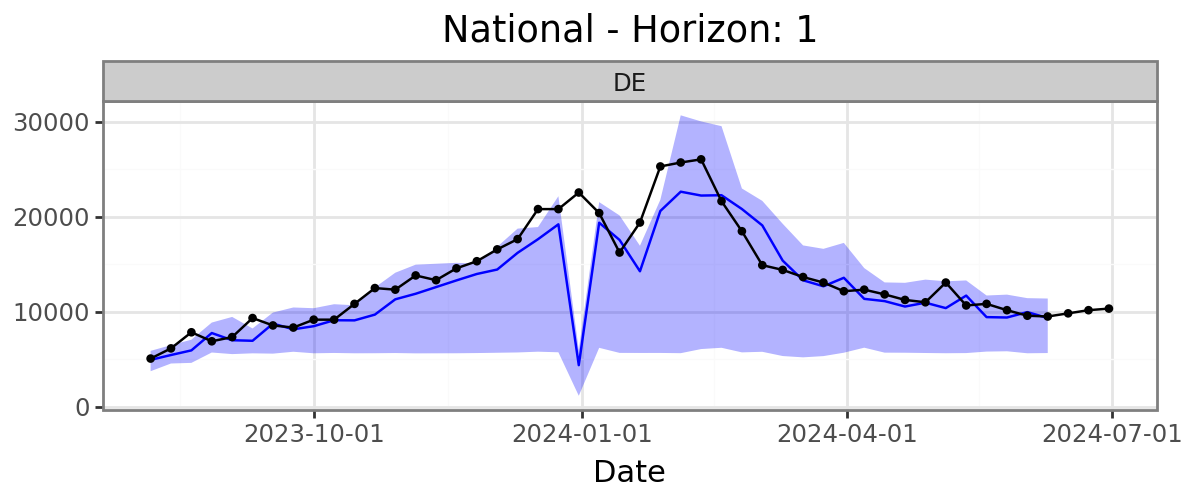

In [33]:
plot_forecasts(df_plot, 'national', horizon=1)

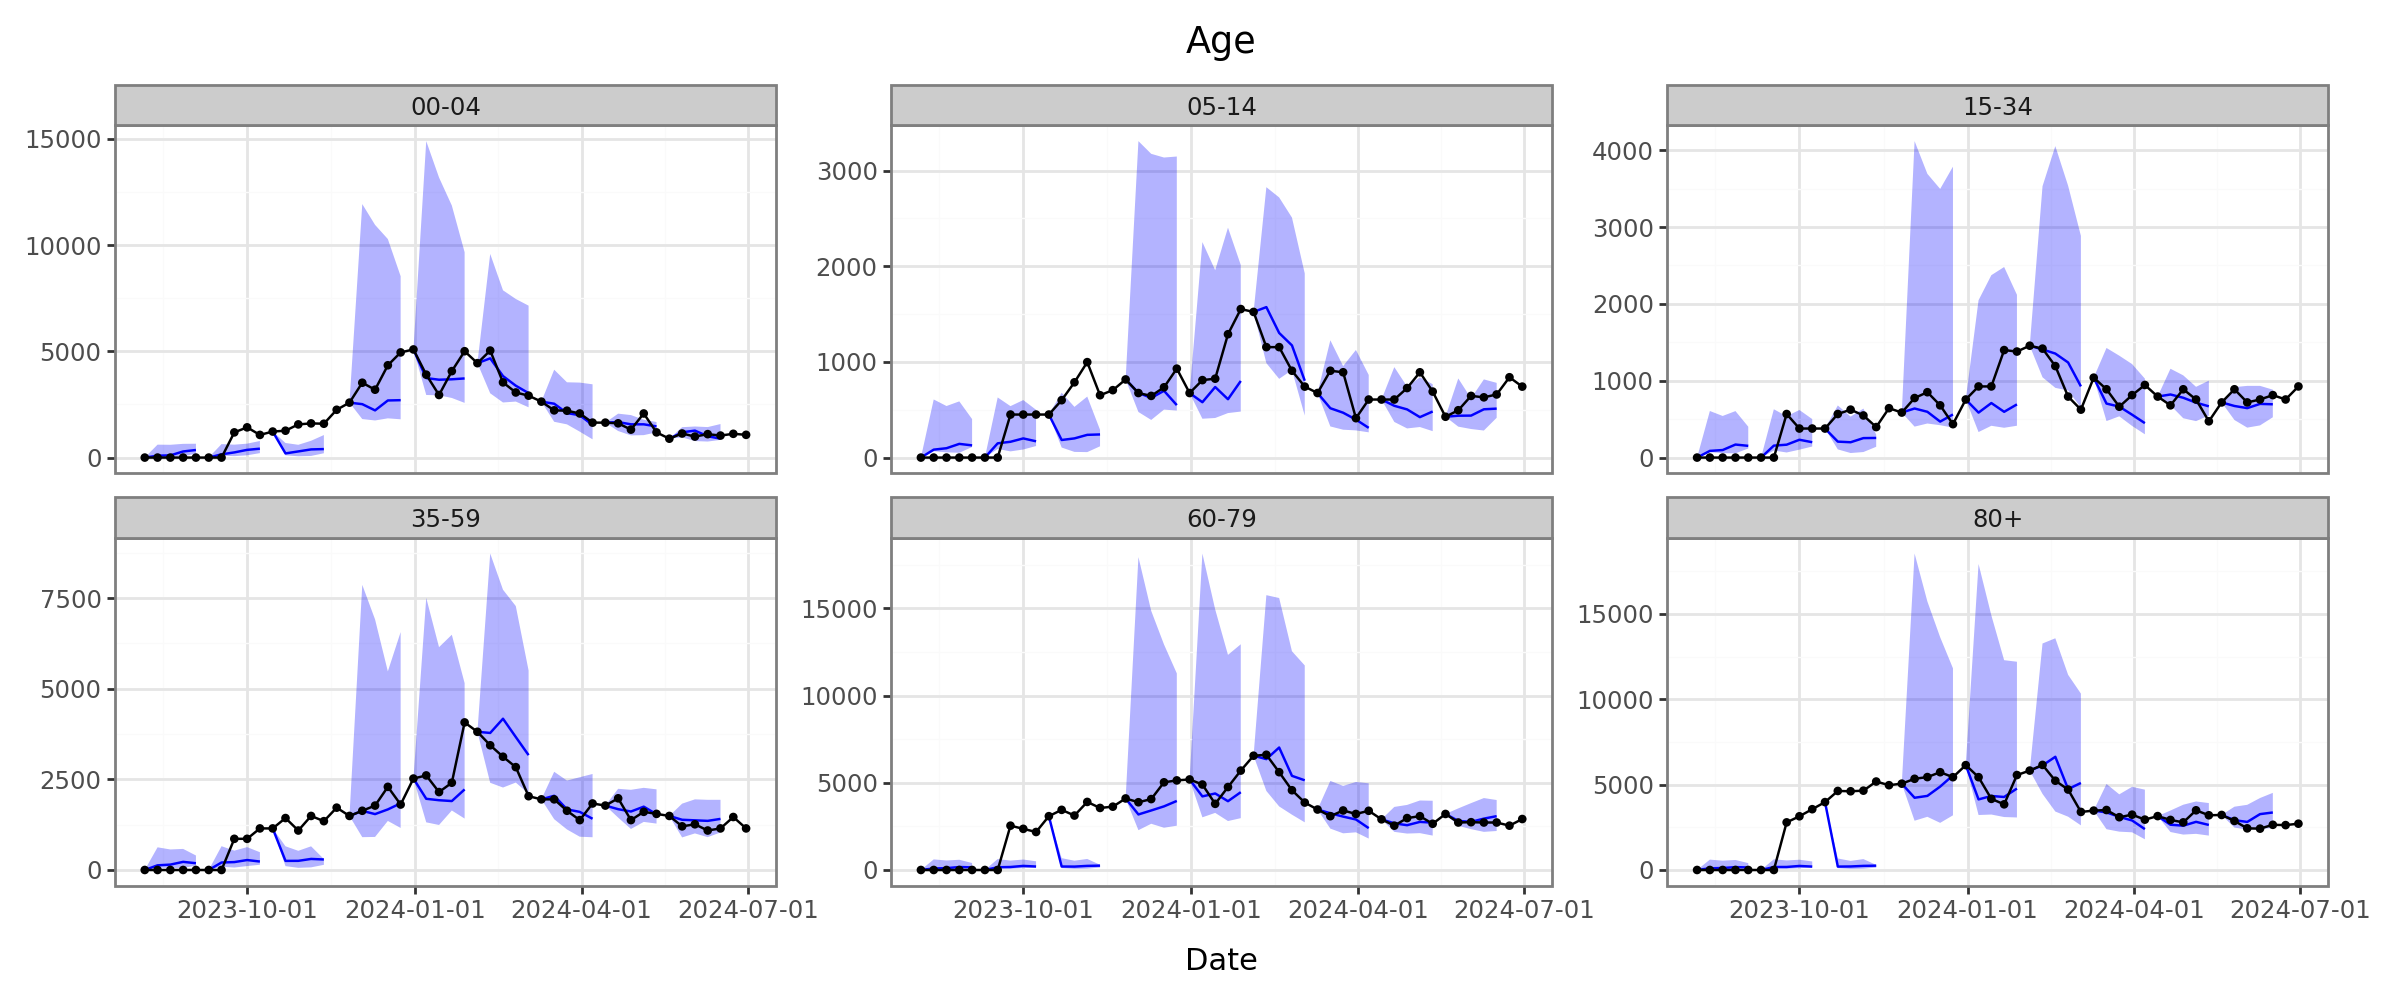

In [34]:
plot_forecasts(df_plot, 'age', start=1)

### Global, covariates

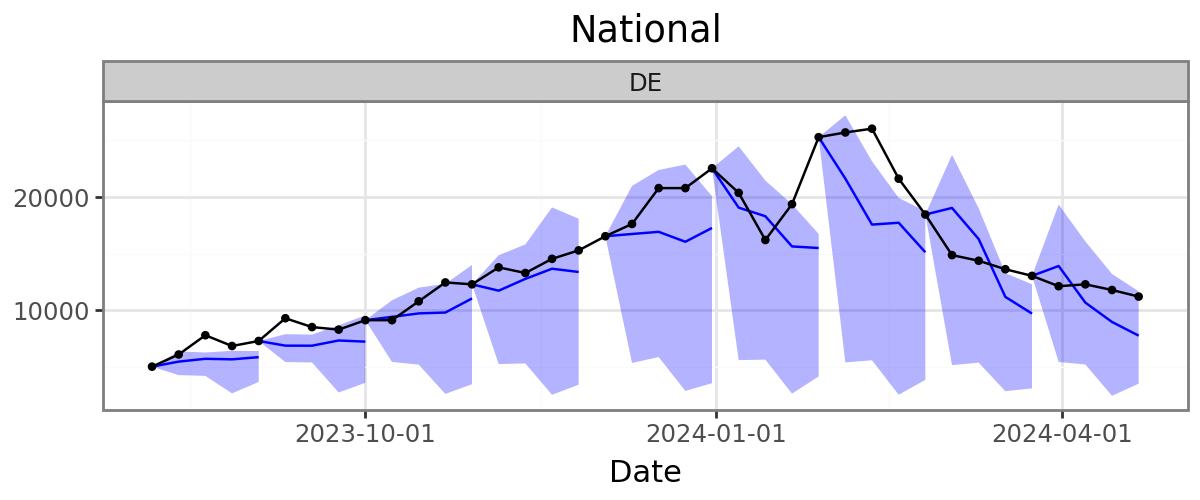

In [53]:
plot_forecasts(df_plot, 'national', start=1, stride=4)

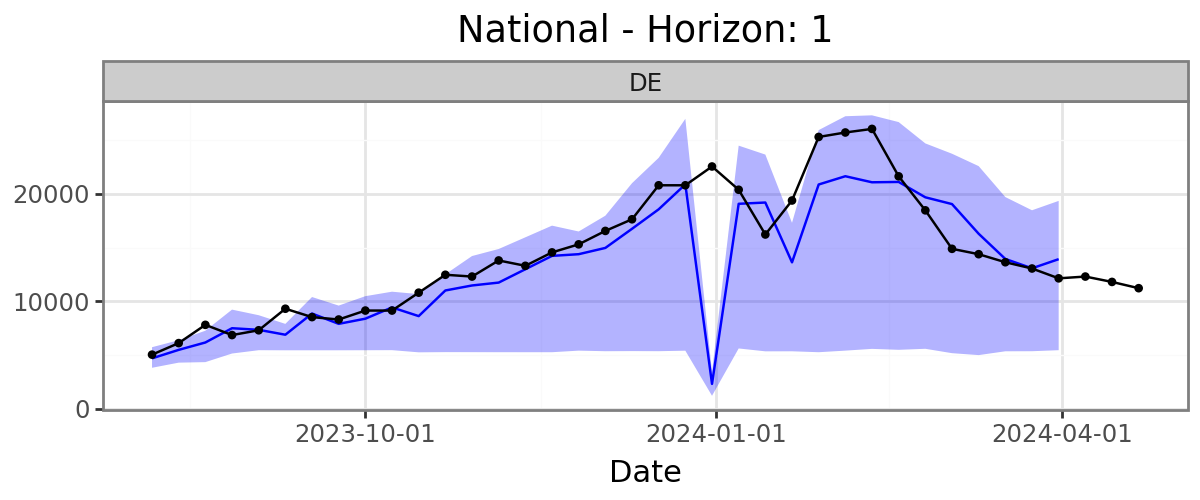

In [54]:
plot_forecasts(df_plot, 'national', horizon=1)

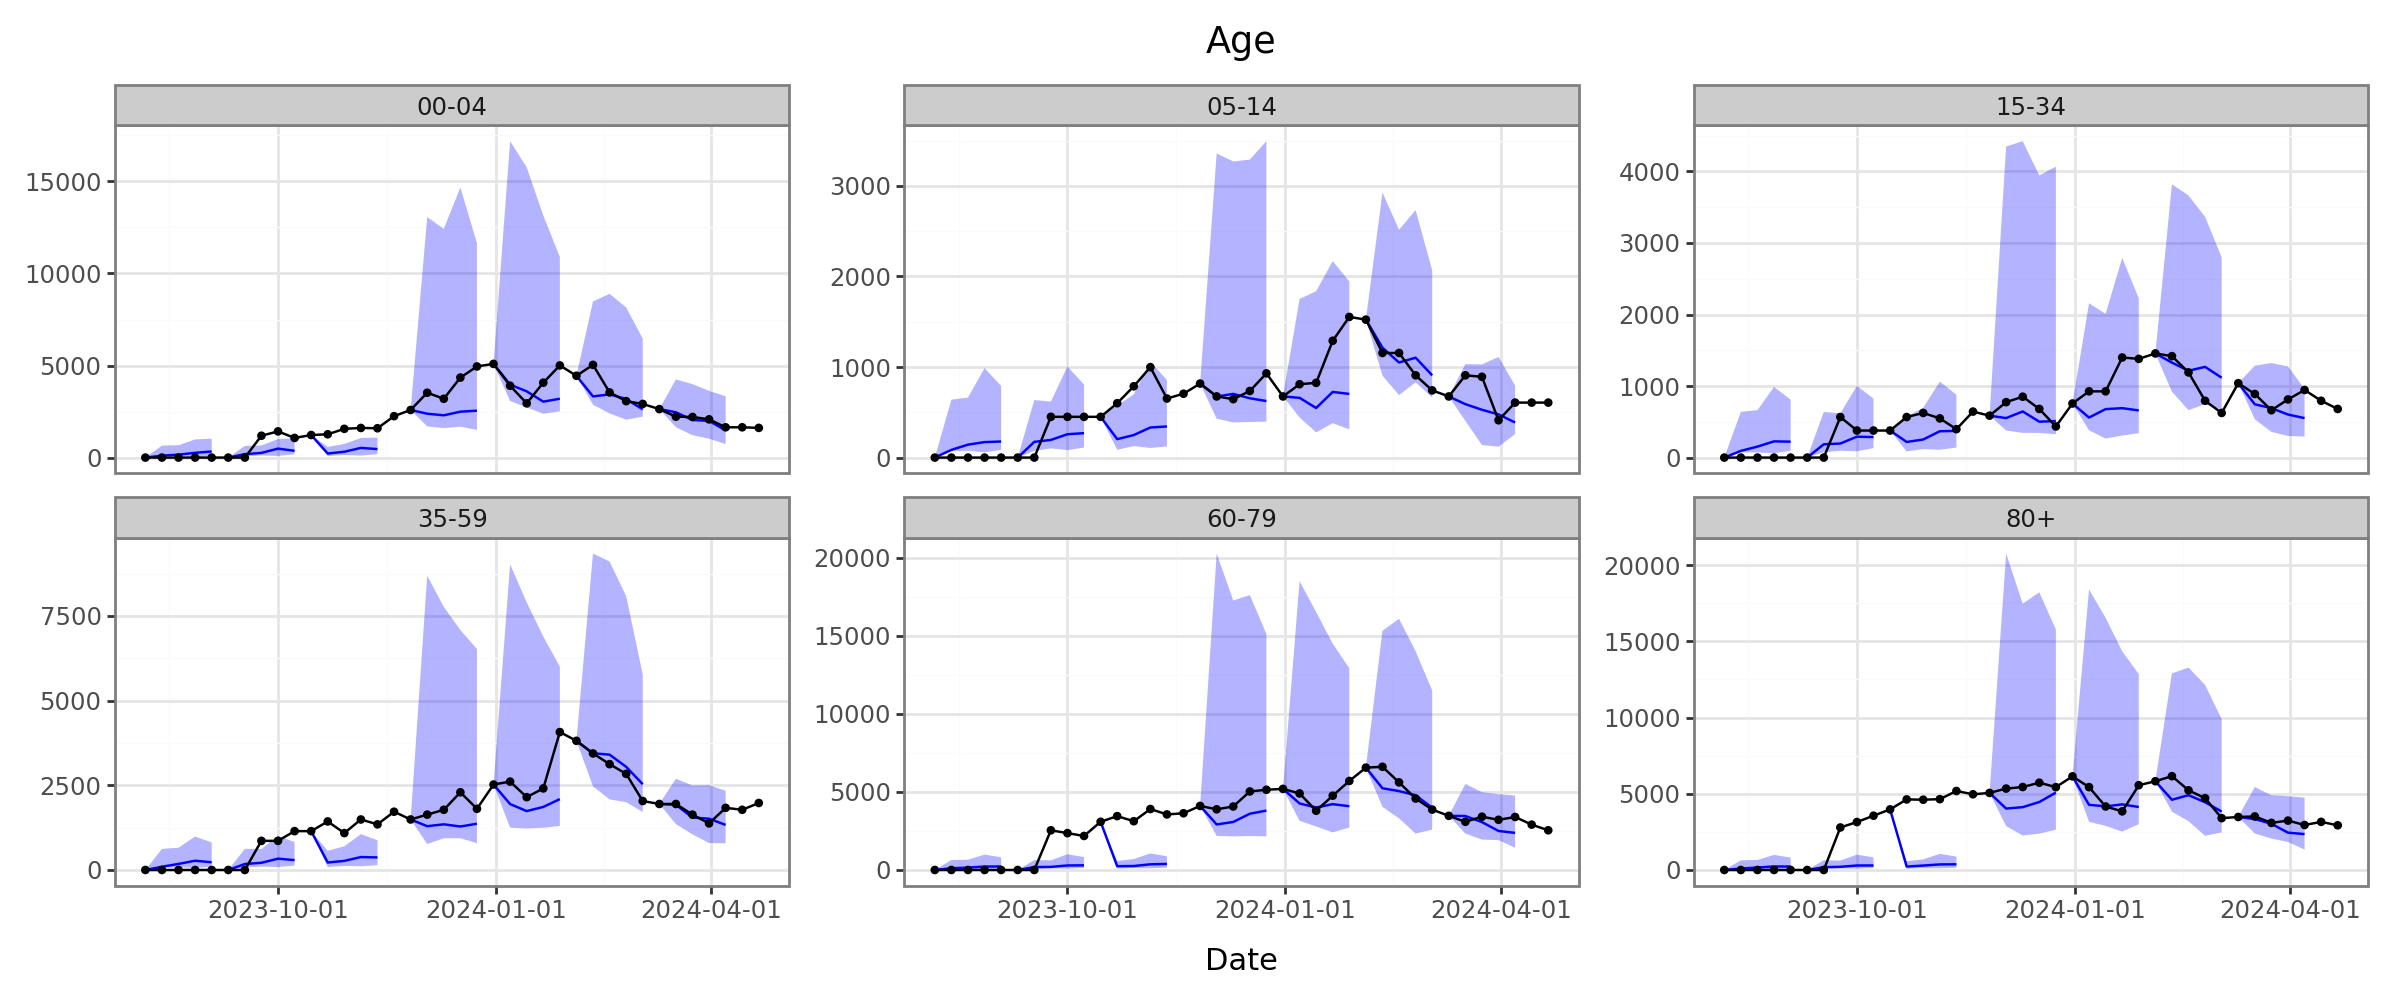

In [56]:
plot_forecasts(df_plot, 'age', start=1)

### Global, no covariates

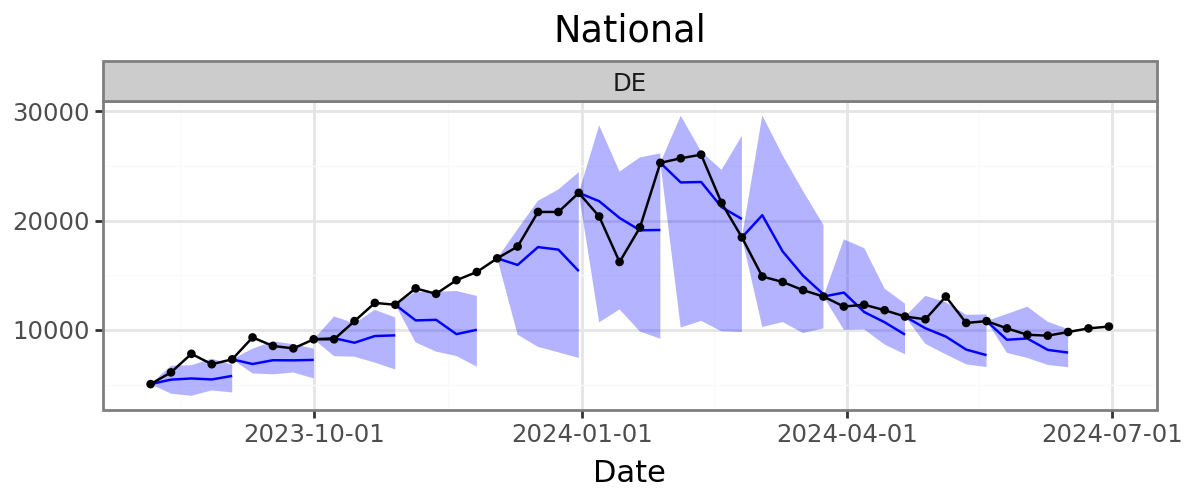

In [96]:
plot_forecasts(df_plot, 'national', start=1, stride=4)

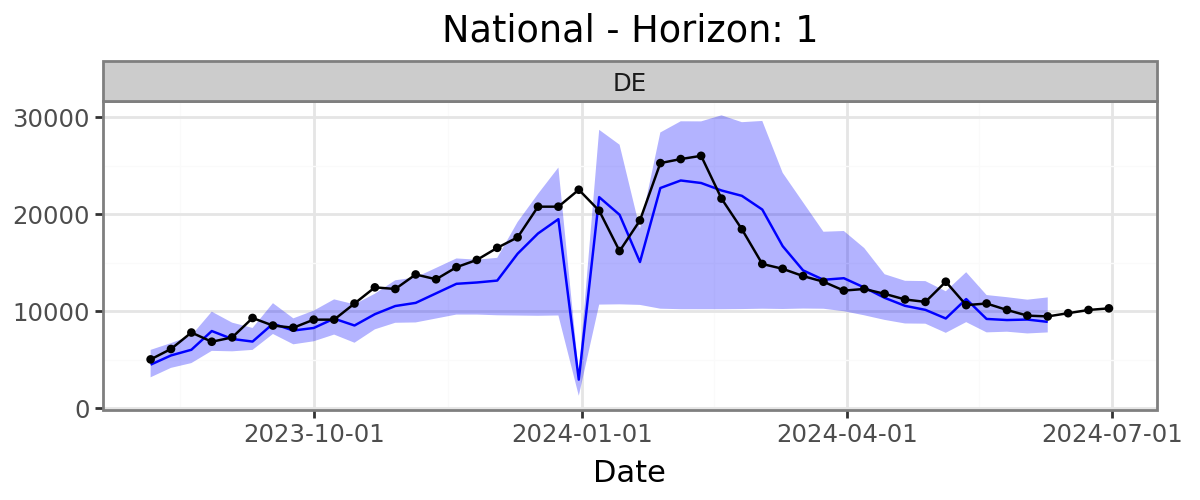

In [97]:
plot_forecasts(df_plot, 'national', horizon=1)

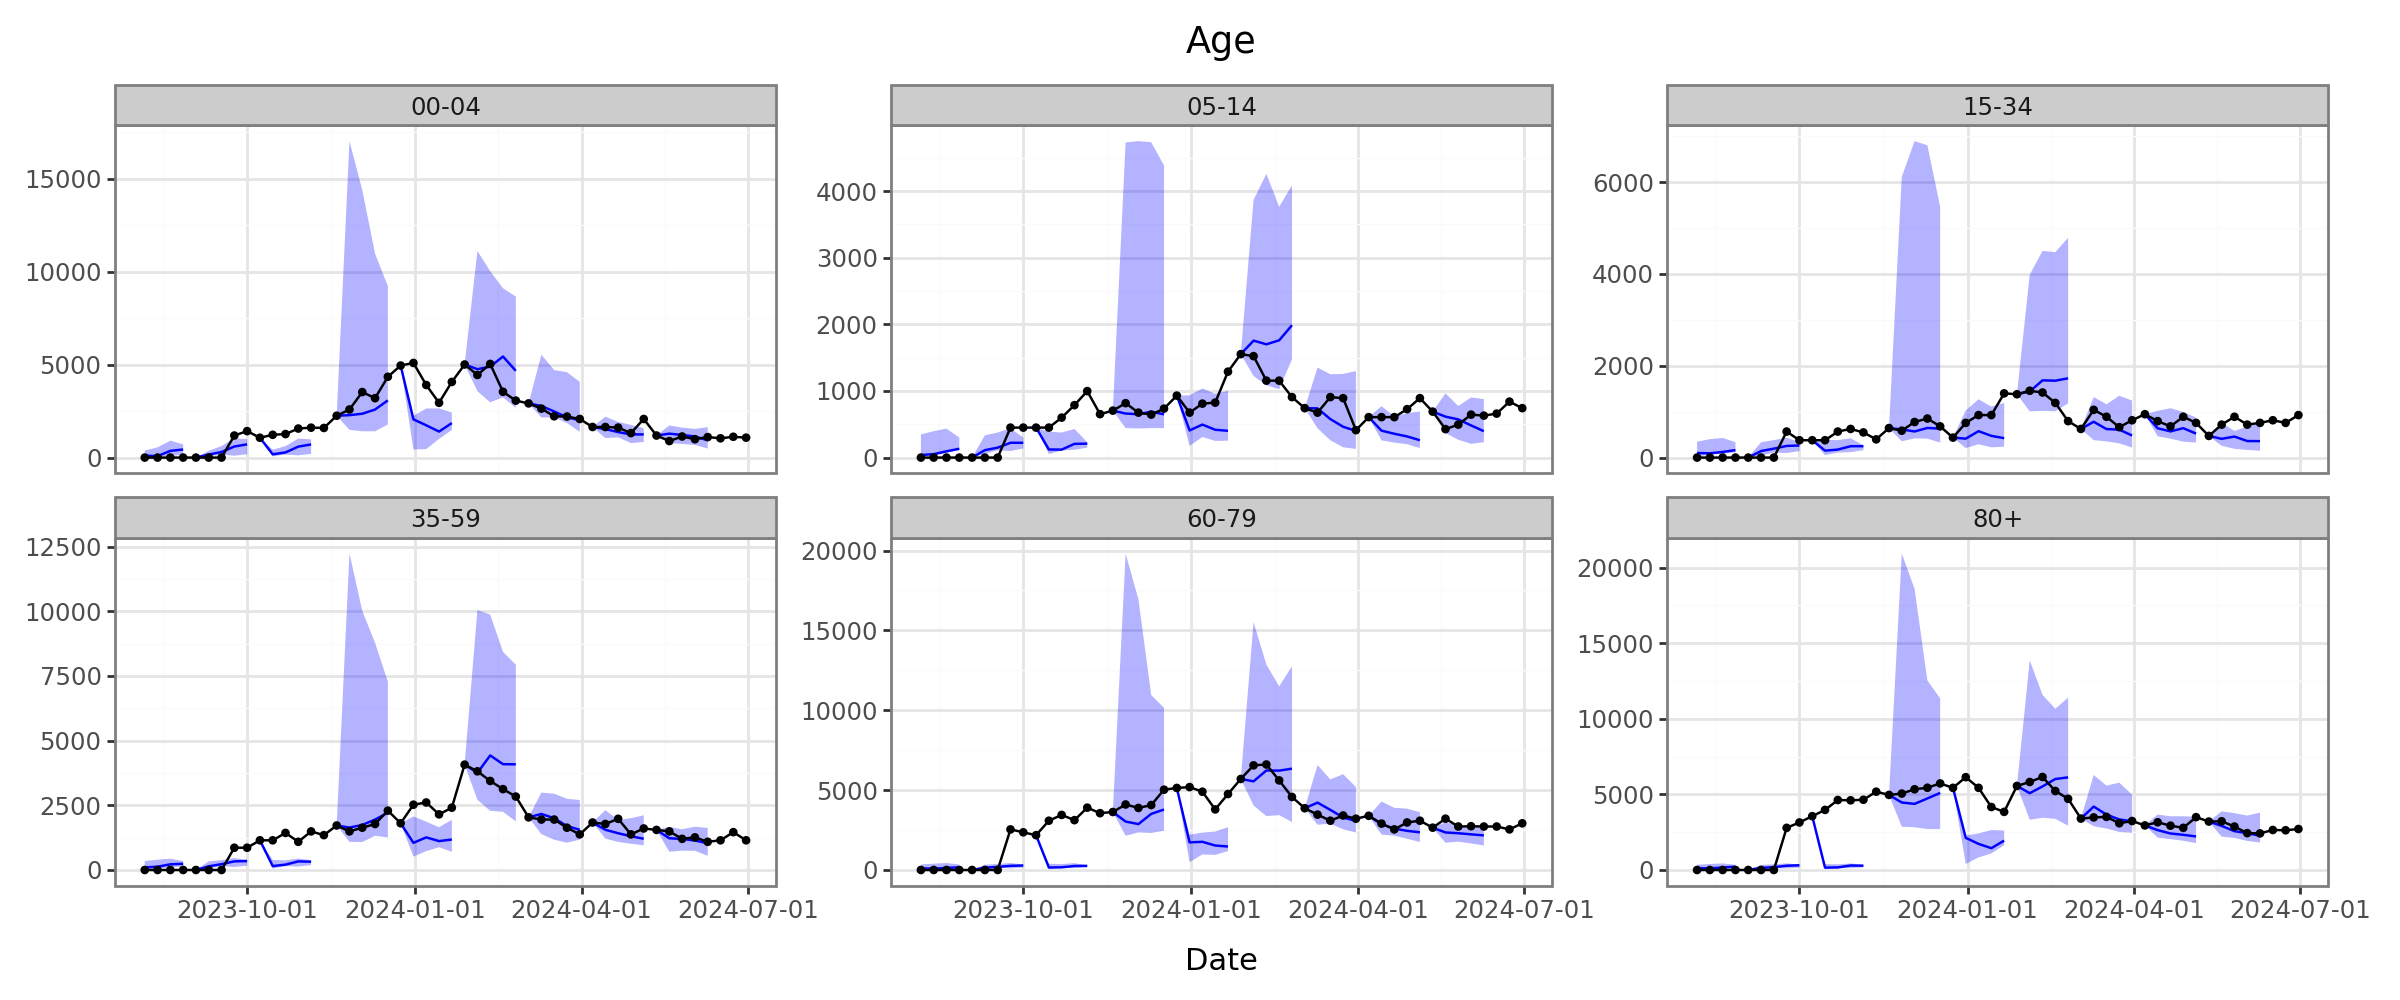

In [98]:
plot_forecasts(df_plot, 'age')